## Introductory Machine Learning: Assignment 3

**Deadline:**

Assignment 3 is due Thursday, October 26 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Random forests
2. Principal components analysis

## Problem 1: Seeing the random forests for the trees (25 points)

This problem is based on the `diabetes` dataset from the `sklearn` package. Please read about the dataset at [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). We will predict the response, which is a quantitative measure of diabetes progression one year after baseline, using regression trees and random forests.

The following cell imports the dataset as `diabetes` and names the predictor variables `diabetes_x` and the response `diabetes_y`. Just run this cell, do not modify it.

In [23]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### 1.1 Building a simple regression tree

To start, you will *manually* build a regression tree using only two of the predictor variables: `bmi` and `s5`. To keep things simple, build a tree that has exactly three nodes and four leaves. So, the data is split into two parts initially and then each of those parts is again split one more time. At each node you will need to evaluate each possible splitting point for both `bmi` and `s5` and pick the one that minimizes the RSS.

When you have built the regression tree, create a scatter plot of `s5` versus `bmi`, color-coded by the response variable. In this plot, use vertical and horizontal lines to indicate the regions that your tree splits the data into. You may find the functions `plt.hlines()` and `plt.vlines()` to be useful.

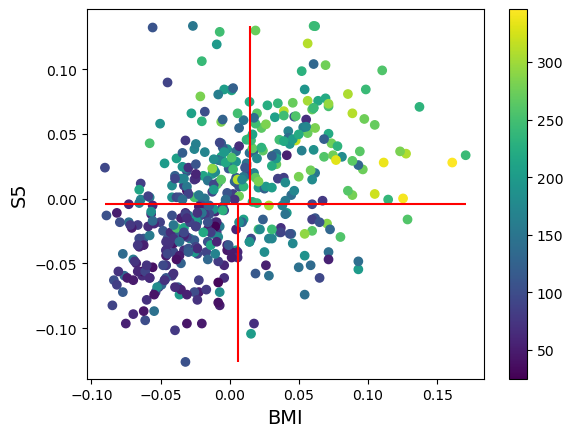

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# extract the data
bmi = diabetes_x[:, 2]
s5 = diabetes_x[:, 8]
rss_bmi = []
rss_s5 = []

# we put a wrapper on the np.mean function to avoid warnings from taking the average of an empty list
def average(x):
    if len(x) == 0:
        return 0.0
    else:
        return np.mean(x)

# the following starter code finds the best splits for bmi and bp at the root
for i in range(len(bmi)):
    left = np.where(bmi <= bmi[i])[0]
    right = np.where(bmi > bmi[i])[0]
    rss_bmi.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) +
                   np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    left = np.where(s5 <= s5[i])[0]
    right = np.where(s5 > s5[i])[0]
    rss_s5.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) +
                  np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))

best_bmi_cut = np.argmin(rss_bmi)
best_s5_cut = np.argmin(rss_s5)

# smallest RSS for the root split
if rss_bmi[best_bmi_cut] < rss_s5[best_s5_cut]:
    root_split_var = "bmi"
    root_split_val = bmi[best_bmi_cut]
else:
    root_split_var = "s5"
    root_split_val = s5[best_s5_cut]

# child nodes:
def split_child(node_data_indices, var_index, label):
    rss = []
    data = diabetes_x[node_data_indices, var_index]
    for i in range(len(node_data_indices)):
        left = np.where(data <= data[i])[0]
        right = np.where(data > data[i])[0]
        rss.append(np.sum((diabetes_y[node_data_indices][left] - average(diabetes_y[node_data_indices][left]))**2) +
                   np.sum((diabetes_y[node_data_indices][right] - average(diabetes_y[node_data_indices][right]))**2))
    
    best_cut_index = np.argmin(rss)
    return data[best_cut_index]

child_split_var_index = 2 if root_split_var == "s5" else 8

if root_split_var == "bmi":
    left_indices = np.where(bmi <= root_split_val)[0]
    right_indices = np.where(bmi > root_split_val)[0]
else:
    left_indices = np.where(s5 <= root_split_val)[0]
    right_indices = np.where(s5 > root_split_val)[0]

left_child_split_val = split_child(left_indices, child_split_var_index, "left")
right_child_split_val = split_child(right_indices, child_split_var_index, "right")

# plot
plt.scatter(bmi, s5, c=diabetes_y, cmap='viridis')
plt.ylabel("S5", fontsize=14)
plt.xlabel("BMI", fontsize=14)
if root_split_var == "bmi":
    plt.vlines(root_split_val, ymin=np.min(s5), ymax=np.max(s5), colors='r')
    plt.hlines(left_child_split_val, xmin=np.min(bmi), xmax=root_split_val, colors='r')
    plt.hlines(right_child_split_val, xmin=root_split_val, xmax=np.max(bmi), colors='r')
else:
    plt.hlines(root_split_val, xmin=np.min(bmi), xmax=np.max(bmi), colors='r')
    plt.vlines(left_child_split_val, ymin=np.min(s5), ymax=root_split_val, colors='r')
    plt.vlines(right_child_split_val, ymin=root_split_val, ymax=np.max(s5), colors='r')

plt.colorbar()
plt.show()


Here is some starter code that you can use to show the four rectangles defined by the leaves. Modify this to use the regions defined by the decision tree above.

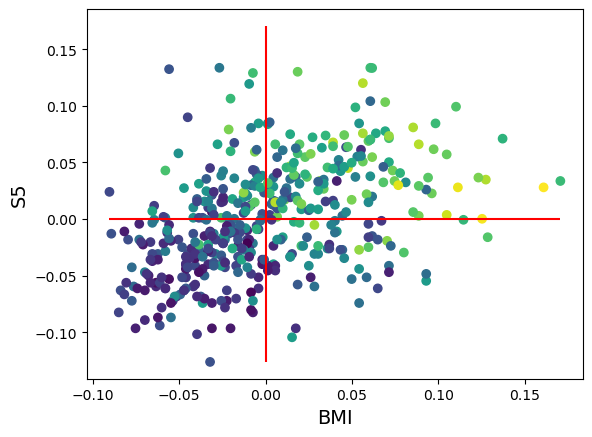

In [25]:
plt.scatter(bmi, s5, c = diabetes_y)
plt.ylabel("S5", fontsize=14)
plt.xlabel("BMI", fontsize=14)
plt.hlines(0, xmin=np.min(bmi), xmax=np.max(bmi), colors='r')
plt.vlines(0, ymin=np.min(s5), ymax=np.max(bmi), colors='r')
plt.show()

### 1.2 Fitting a full regression tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set of equal size (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use cross-validation to choose parameters in later parts of this problem set. Some starter code is provided:

In [60]:
from sklearn import tree

# regr = tree.DecisifgonTreeRegressor().fit()
# tree parameters go inside the first set of parentheses and the
# training data goes in the second set of parentheses. Check the
# documentation for details.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size=0.5, random_state=42)

regr = tree.DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

### 1.3 Plotting the tree

Plot your regression tree. To do so, just execute the cell below; no
need to modify it.

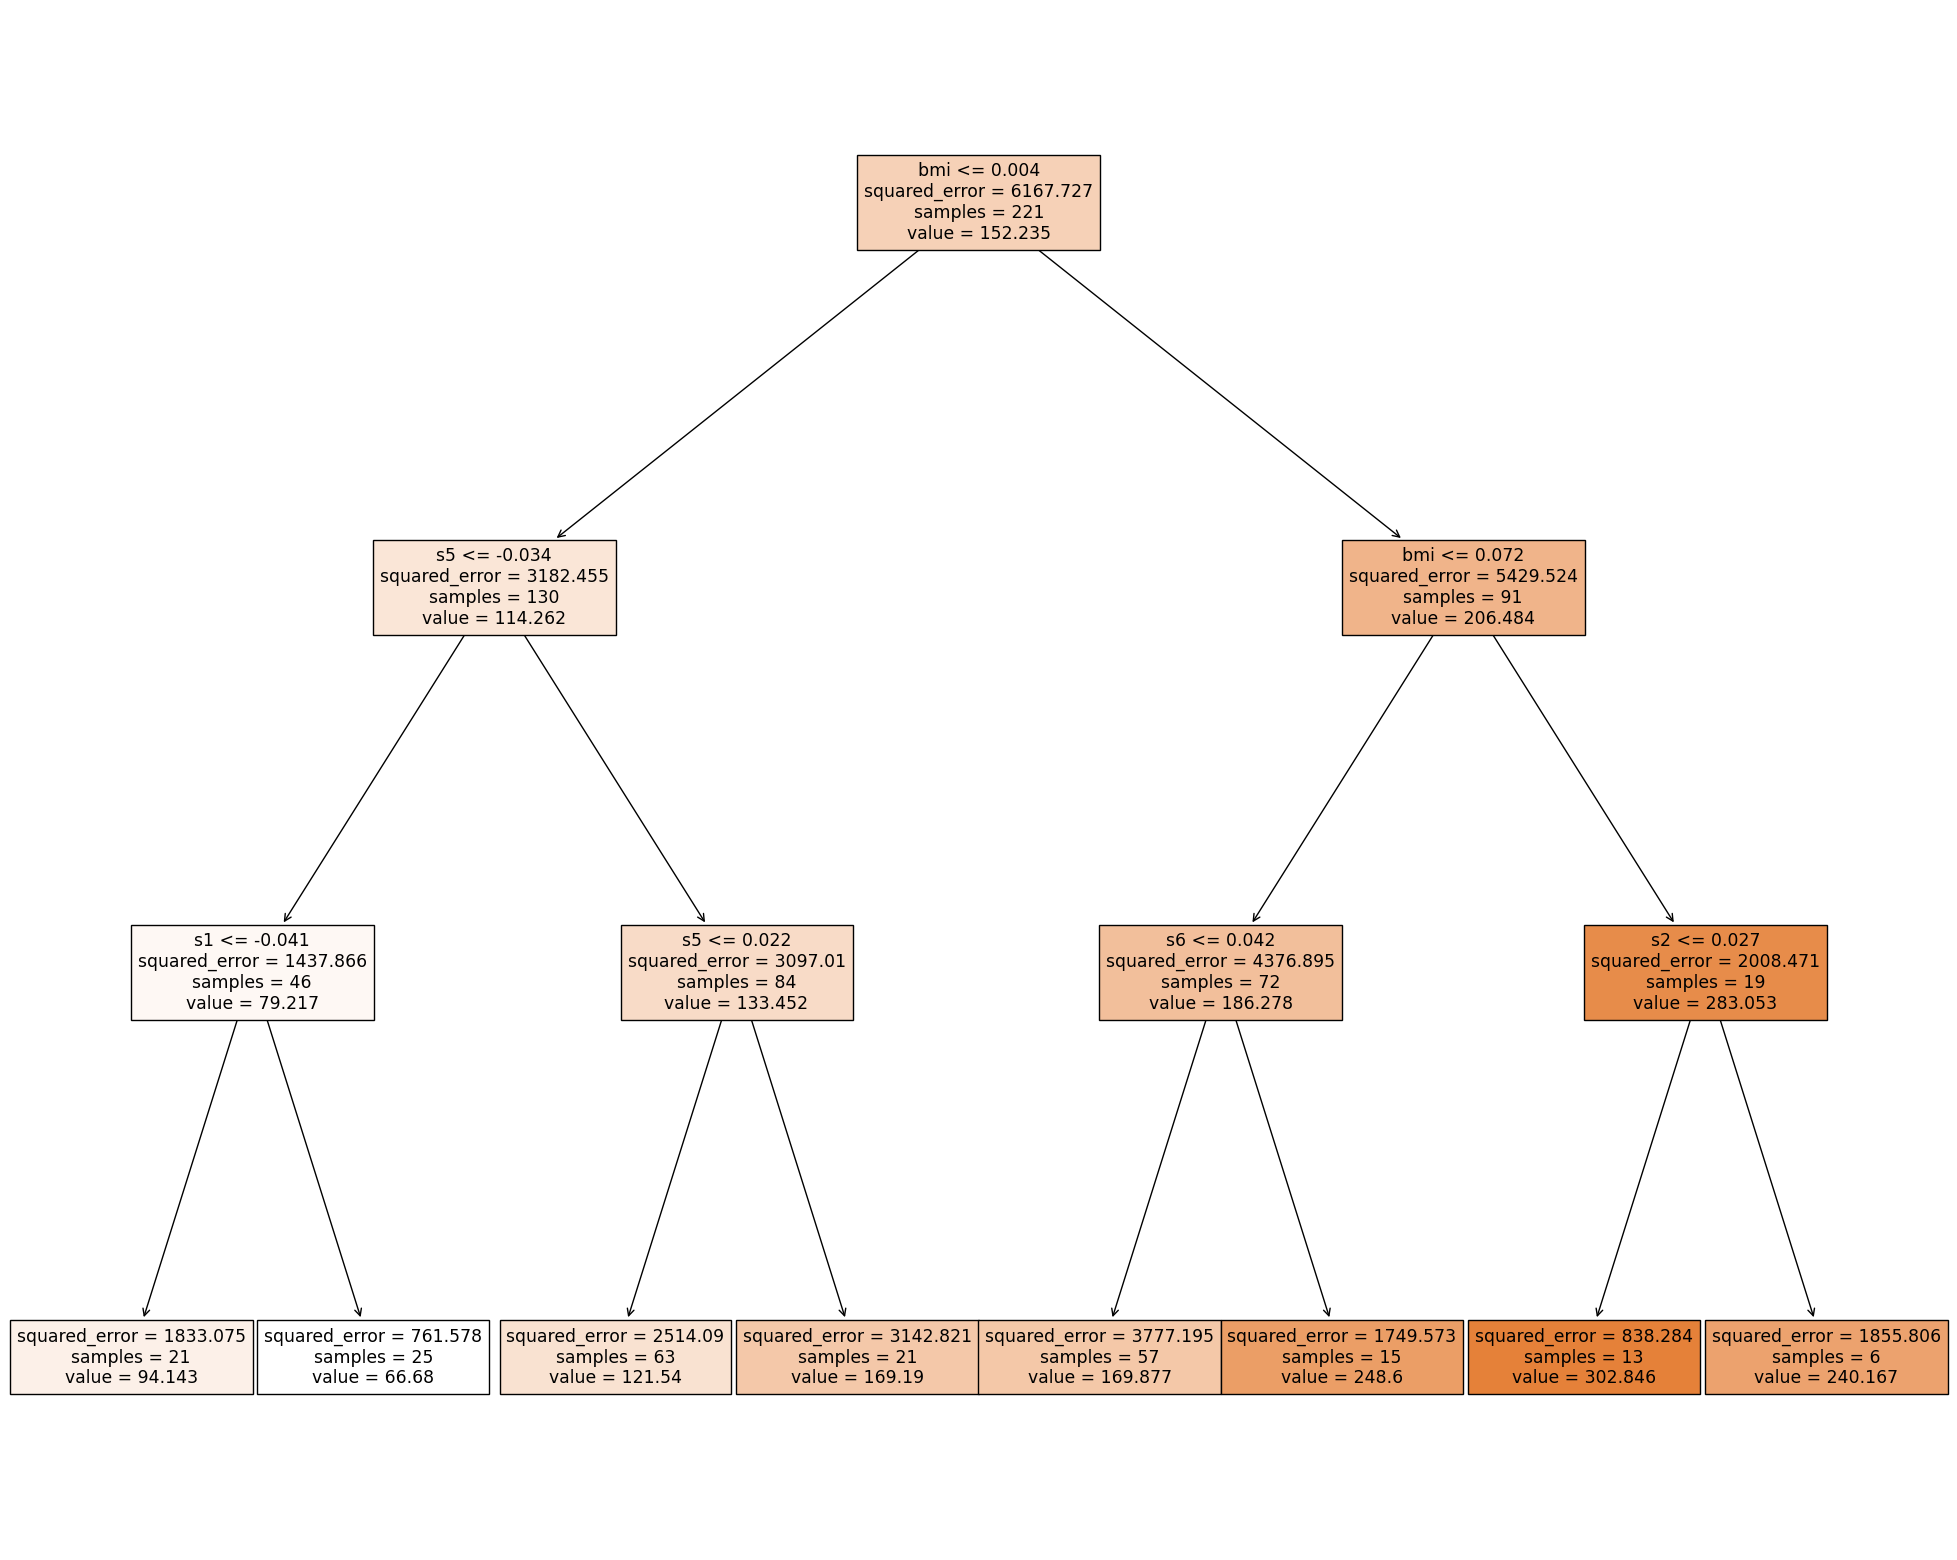

In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True, feature_names=diabetes.feature_names)

### 1.4 Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond to higher or lower measures of diabetes progression? What is the MSE of the model using the test set? The `.predict` method for your model can help with this.

In [62]:
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred)

print(f"MSE for Decision Tree: {mse_tree:.2f}")

MSE for Decision Tree: 3999.39


The MSE is 3999.39. Based on the visualization, the variables that seem to correspond to higher or lower measures of diabetes progression are bmi, bp, and s5. For bmi, as its values increase, the diabetes progression measure (target) tends to increase as well. Similarly, for bp and s5, there's a moderate positive correlation. Conversely, some variables like sex and s6 seem to have a scattered correlation with the target, suggesting a weaker relationship.

### 1.5 Using random forests

Finally, we will grow random forests to analyze the data,
using the `RandomForestRegressor` function from `sklearn.ensemble`. Again, please use your best judgment to choose the initial parameters for tree complexity.

In [50]:
from sklearn import ensemble

# Here is an example of how to use the random forest function in sklearn.ensemble.
# The code below assumes that the training inputs and responses are loaded in the variables train_x and train_y
# and that the test predictor variables are in test_x

# dtr = ensemble.RandomForestRegressor(min_samples_leaf=15, max_features=m)
# regr = dtr.fit(train_x, train_y)
# pred_y = regr.predict(test_x)
# mse = np.mean(np.square(test_y-pred_y))

## -- please write your answer here. -- ## 

dtr = ensemble.RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
regr = dtr.fit(X_train, y_train)
pred_y = regr.predict(X_test)
mse = np.mean(np.square(y_test-pred_y))

print(f"MSE for Random Forest: {mse_rf:.2f}")

MSE for Random Forest: 3110.57


Answer the following questions to compare the performance of random forests to a single regression tree.

1. What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

1. According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

1. Plot the MSE of the prediction against $m$, the number of variables considered at each split.

1. Comment on the plot you created and if it makes sense.

In [52]:
## Write your answers here, using a mix of Markdown and code, as appropriate.

*Question 1:*  The test MSE of the random forest (3110.57) is lower than that of the single regression tree (MSE = 3999.39) due to the ensemble nature of random forests. Combining multiple trees helps to reduce overfitting.

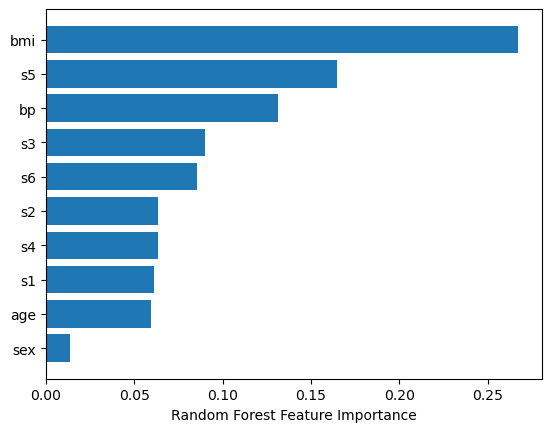

In [56]:
##Question 2:

importances = regr.feature_importances_
sorted_feature_names = [diabetes.feature_names[i] for i in importances.argsort()]

plt.barh(sorted_feature_names, importances[importances.argsort()])
plt.xlabel("Random Forest Feature Importance")
plt.show()

According to the barplot, BMI appears to have the most predictive power for diabetes progression with s5 or log serum triglycerides having the second highest predictive power.

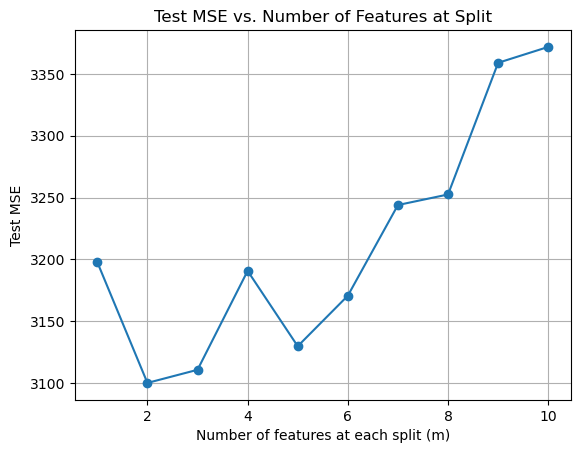

In [57]:
#Question 3:

mses = []
features = list(range(1, len(diabetes.feature_names)+1))

for m in features:
    rf_m = RandomForestRegressor(n_estimators=100, max_features=m, random_state=42)
    rf_m.fit(X_train, y_train)
    y_pred_m = rf_m.predict(X_test)
    mse_m = mean_squared_error(y_test, y_pred_m)
    mses.append(mse_m)

plt.plot(features, mses, marker='o')
plt.xlabel('Number of features at each split (m)')
plt.ylabel('Test MSE')
plt.title('Test MSE vs. Number of Features at Split')
plt.grid(True)
plt.show()

*Question 4:* The plot makes sense as it shows that the model finds the most predictive power with just two features (probably BMI and s5 based on the feature importance chart). Adding more features, at least up to a point, adds more noise rather than signal. At 5 features, there's a marginal decrease in MSE from 4, suggesting some additional feature(s) have relevance. However, beyond that, MSE only increases with added complexity.

## Problem 2: PCA: Penguin Culmen Analysis (20 points)

Let's revisit our flightless friends with the new tools we've learned.

In [102]:
# run the cell to import needed packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [103]:
# just run this cell to read in the data

df = pd.read_csv('https://github.com/YData123/sds265-fa22/raw/master/assignments/assn2/penguins.csv')
df = df.drop(columns=['index','year','island'])
df = df.dropna(axis=0)

# encode the labels
species = list(set(df['species']))
df['class'] = LabelEncoder().fit_transform(df['species'])
sex = [int(list(df['sex'])[j]=='male') for j in range(len(df))]
df['sex'] = sex
df = df.drop(columns=['species'])

y = np.array(df['class'])
X = df.copy()
X = X.drop(columns=['class'])

In [104]:
# just run this cell to standardize

for i in range(5):
    X.iloc[:,i] = (X.iloc[:,i]-np.mean(X.iloc[:,i]))/np.std(X.iloc[:,i])

print(f"X is {X.shape[0]} rows with {X.shape[1]} columns.")

X is 333 rows with 5 columns.


### 2.1 Run PCA

In the next cell, carry out Principle Component Analysis to reduce the data from 5 dimensions to 2.

Let `pv1` be the first principal vector and let `pv2` be the second principal vector. Let `pcs` be the projection of the data onto the first two principal vectors.

In [107]:
# Your code here

pca = PCA(n_components=2)
pca.fit(X)

pv1 =  pca.components_[0] # your code here
pv2 =  pca.components_[1] # your code here
pcs =  pca.fit_transform(X)

principalX = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])

### 2.2 Principle Component Analysis

The next cell plots the principal vectors.

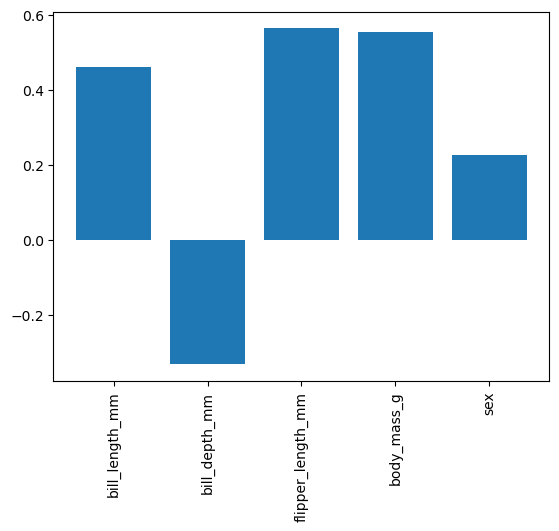

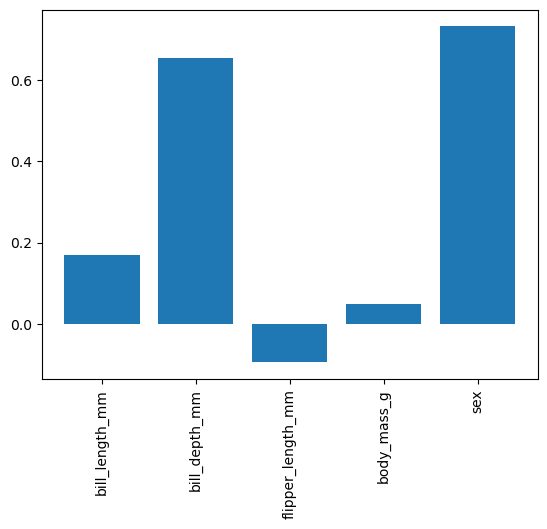

In [108]:
# just run this cell

plt.bar(range(5), pv1)
plt.xticks(range(5), X.columns, rotation='vertical')
plt.show()

plt.bar(range(5), pv2)
plt.xticks(range(5), X.columns, rotation='vertical')
plt.show()

Are the first two principle vectors orthogonal? Write code to check and also explain conceptually.

Looking at the plot, what are the first two principle components capturing, in terms of the original features we have?

In [110]:
# Your code here
dot_product = np.dot(pv1, pv2)
print(dot_product)

-2.7755575615628914e-17


Yes, the first two principal vectors are orthogonal. The dot product of two vectors is equal to the magnitude of both vectors times the cosine of the angle between them. The cosine of 90 degrees is 0 and the resulting dot product above is a value extremely close to 0. This also makes sense because the second principal component vectors should capture the highest variance from the uncaptured data from the first component. Orthogonality assumes linear independence which enables PCA to capture as much variance with as few components as possible.

### 2.3 Visualization

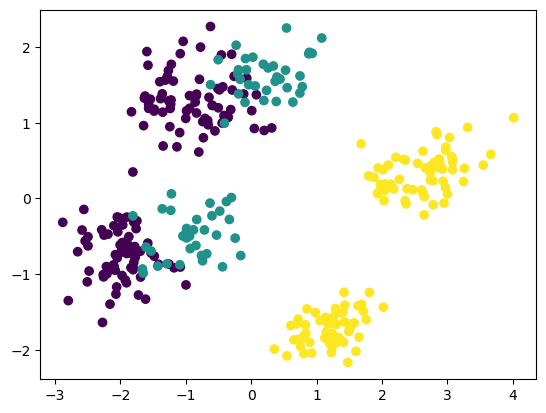

In [111]:
# just run this cell

plt.scatter(principalX.iloc[:, 0], principalX.iloc[:, 1], c = y)
plt.show()

What is being plotted in this cell above? If you are to add an xlabel and ylabel, what would you call them?

Can you explain why there are pretty much 6 clusters in the plot?

Recall when we plotted using two features of your choice in assignment 2. How are these different and similar?

The plot shows the data projected onto the first two principal components. The x-axis can be labeled "PC1" and the y-axis "PC2". There are pretty much 6 clusters in the plot because the penguins are separated by the three species and the differences between sexes within each one. In other words, each cluster corresponds to a species and sex with 6 possible combinations (eg. Adelie females). In assignment 2, the feature pair plot also has clustered points but is chosen to determine some relationship with the target variable. The goal is to use these features to make predictions. In this case, the plot is not useful for predictions but for exploring the overall structure and relationships in the data. It can reveal clusters, patterns, and trends that might not be evident in the original high-dimensional feature space.

### 2.4 Visualization with decision boundries

We now want to add the decision boundries to the plot. (Similar to what we did in assignment 2, but this time using the first 2 principle components as x and y.)

In [113]:
# just run this cell
# the function will again help you plot the decision boundries

def plot_decision_boundaries(X, y, lr, error):
    X2 = np.array(X)
    b = lr.intercept_
    beta = lr.coef_.T
    colors = ['orange', 'pink', 'lightgreen']
    h = 0.015
    x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
    y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], beta) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, levels=[0,.5,1.5,2.5], colors=colors, alpha=0.5)
    for c in range(3):
        mask = (y==c)
        plt.scatter(X2[np.array(mask),0], X2[np.array(mask),1], color=colors[c], label=species[c])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(loc='upper left')
    plt.title('error rate: %.2f' % error)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

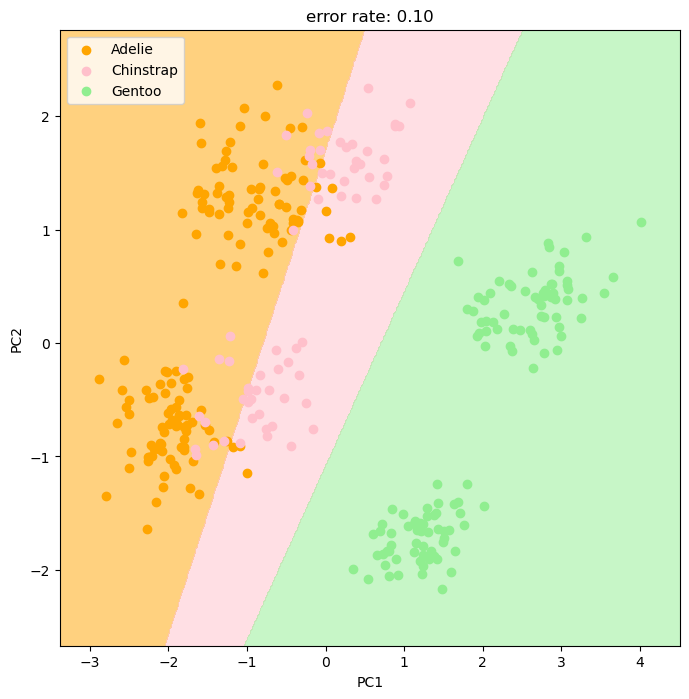

In [114]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(principalX, y, test_size=0.2, random_state=42)
lr = LogisticRegression().fit(X_train, y_train)
error = 1 - lr.score(X_test, y_test)

plot_decision_boundaries(principalX, y, lr, error)

How do you think the model performed comparing to the models you ran in assignment 2?

This model performed significantly better than the models in assignment 2 because although there is some overlap the decision boundaries appear far clearer.

# Problem 3: PCA Applications -- Faces and Genetics data

In this problem, we will apply PCA to two applications. In the first, we will apply PCA to analyze some face image data and try to understand the variation in this data. In the second application, we will apply PCA to some genetics data and recover an interesting connection with geography!

In [131]:
import numpy as np
from sklearn.decomposition import PCA

## Problem 3.1: Face image data

In this problem, we will apply implementation of PCA to analyze face image data from the `olivetti_faces` dataset. The dataset consists of $64 \times 64$ greyscale images of faces taken in a controlled setting, varying lighting, facial expressions (eyes open/closed, smiling/not smiling), and facial details (glass / no glasses). The dataset consists of 40 subjects with 10 images for each. It was collected by AT&T between 1992 and 1994.

We will try to understand the variation in face (images) by performing principal component analysis!

First, we fetch the dataset and define a utility function for plotting a gallery of images.

In [132]:
# this cell fetches the data and defines a function to plot the images

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# get data
faces, _ = fetch_olivetti_faces(return_X_y=True)

n_samples, n_features = faces.shape
image_shape = (64, 64)

# define a utility function to plot a gallery of images
def plot_gallery(title, images, n_col=3, n_row=2, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

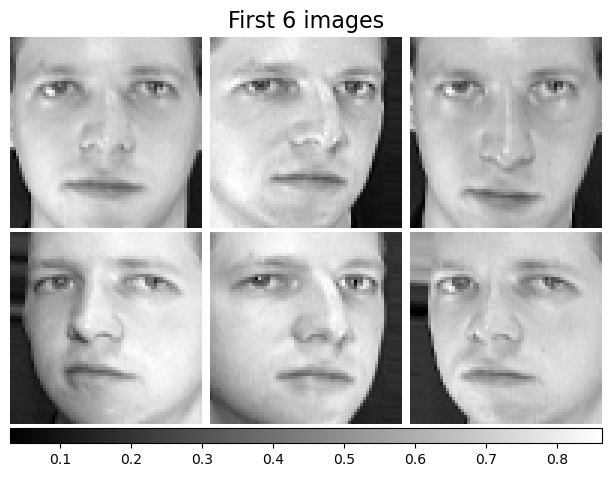

In [133]:
# plot first 6 images in dataset
plot_gallery("First 6 images", faces[:6, :])

### Problem 3.1.1: Fit PCA and visualize the top principal vectors

In [134]:
# fit PCA to the `faces` data. Use `n_components=None` to compute the maximal number of principal vectors
# your code here
pca = PCA(n_components=None)
pca.fit(faces)

PCA()

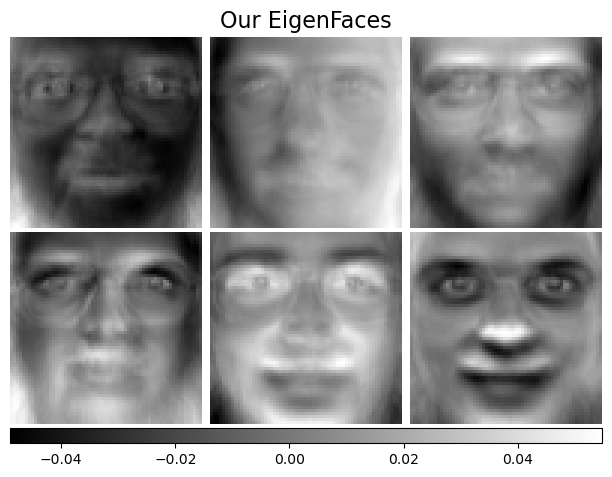

In [135]:
# extract the principal vectors from the fitted PCA object
face_principal_vectors = pca.components_
plot_gallery("Our EigenFaces", face_principal_vectors)

### Problem 3.1.2: Visualize explained variance of the top $k$ principal vectors

When we compute PCA, we can get the "explained variance" of each principal vector. In this problem, we will visualize the explained variance to better-understand the variation in the data.

Recall that in `sklearn`'s implementation of PCA, the explained variance ratio of the $i$ th principal vector is given by `pca.explained_variance_ratio_[i]`. This is a number between 0 and 1. You can think of this as the percentage of the variation in the data in the direction of the $i$ th principal vector.

Then, we can define the cumulative explained variance of the top $k$ principal vectors as,
$$\mathrm{cumulative\_explained\_variance\_ratio}(k) = \sum_{i=1}^{k} \mathrm{explained\_variance\_ratio}(i).$$

This quantity represents the proportion of the variation in the data which is explained by the first $k$ principal vectors. In this problem, we will plot $k$ against against $\mathrm{explained\_variance\_ratio}(k)$ and $\mathrm{cumulative\_explained\_variance\_ratio}(k)$. This gives us an idea of how many directions account for most of the variation in the data.

------
**Aside**: How is the "explained variance ratio" obtained?

Recall that PCA is computed via the eigenvectors and eigenvalues of the empirical covariance matrix. Let $S$ be the empirical covariance matrix. Then, its eigenvectors $v_i$ are the principal vectors. Denote the eigenvalue of the $i$ th eigenvector by $\lambda_i$. In `sklearn`, the eigenvalues are accessible via `pca.explained_variance_`; $\lambda_i$ is `pca.explained_variance_[i]`. The "explained variance ratio" is a ratio of each eigenvalue to the sum of the eigenvalues. That is, $\mathrm{explained\_variance\_ratio}(i) = \lambda_i / \sum_j \lambda_j$.

The eigenvalue of a particular eigenvector of the covariance matrix will be larger when there is more variation in that direction. The "ratio" part of explained variance simply normalizes these eigenvalues so that they sum to 1, giving the quantity an interpretation as the proportion of the variance explained by a particular direction.

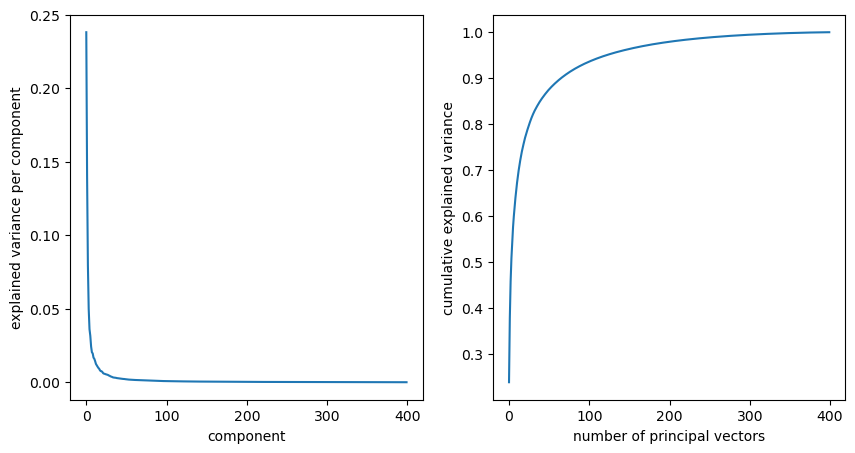

In [136]:
# plot the explained variance of the top k principal components as a function of k

# extract the explained variance ratio of each principal vector
explained_variance_ratio_per_component = pca.explained_variance_ratio_ # your code here

# compute cumulative explained variance ratio upto k components for each k
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio_per_component) # your code here (hint: you can use np.cumsum or do the sum yourself)

# plot the explained variance ratio per component and the cumulative explained variance ratio
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)
ax1.plot(explained_variance_ratio_per_component)
ax1.set_xlabel('component');
ax1.set_ylabel('explained variance per component');


ax2.plot(cumulative_explained_variance_ratio)
ax2.set_xlabel('number of principal vectors');
ax2.set_ylabel('cumulative explained variance');

Comment on the curve you observe. Roughly how many principal vectors are required to explain 90\% of the variance? What does this tell you about the underlying variation in the data?

Roughly 100 principal vectors are required to explain 90% of the variance by the cumulative explained variance plot, as the line assends to 0.9 at 100 principal vectors. The steep drop in explained variance per component before the flattening of the curve tells us that the first few components capture most of the variance in the data.

### Problem 3.1.3: Reconstructing data from principal components

In this question, we will use PCA to re-construct the face images from fewer principal components. The plots above show that most of the variance in the data is explained by the first few principal components. In this question, we will visualize this by reconstructing a face image using the first $k$ principal components, varying $k$. We will then use the face image PCA to (attempt to) reconstruct an image of an octopus.

Recall that the first $k$ principal components, $v_1, \ldots, v_k$ give an orthonormal basis for a $k$-dimensional subspace of the data. The first $k$ principal components of a point $x \in \reals^d$ are given by $\left(v_1^\top (x - \bar{x}), \ldots, v_k^\top (x - \bar{x})\right)$. Each principal component represents the amount of $x$ that lies in the direction of the corresponding principal vector. The principal components can then be used to reconstruct $x$ via,

$$\hat{x} = \bar{x} + \sum_{i=1}^k \left(v_i^\top (x - \bar{x})\right) v_i.$$

This is essentially a projection onto the $k$-dimensional subspace spanned by the principal vectors $v_1, \ldots, v_k$ (after centering by the mean).

In the `sklearn` implementation of PCA, the mean vector $\bar{x}$ is accessible via `pca.mean_` and the principal vectors are accessible by `pca.compnents_`.

Implement a function `project_principal_vectors` which computes $\hat{x}$ for a given $x$, reconstructing a point in terms of the principal vectors.

In [137]:
def project_principal_vectors(x, principal_vecs, mean_x, k):
    """
    project a data point onto the first k principal vectors

    Parameters
    ----------
    x : np.ndarray of shape (d,)
        test data point
    principal_vecs : np.ndarray of shape (min(d, n), d)
        array of eigenvectors where eig_vecs[i] is the ith eigenvector
    mean_x : np.ndarray of shape (d,)
        the mean vector of the data
    k : int
        number of principal vectors to project onto

    Returns
    -------
    np.ndarray of shape (d,)
        the projection of x onto the first k principal vectors
    """

    # center the data point
    centered_x = x - mean_x # your code here

    # compute the projection onto the first k principal components
    projection = mean_x + sum([
        np.dot(centered_x, principal_vecs[i]) * principal_vecs[i] # your code here
        for i in range(k)])

    return projection

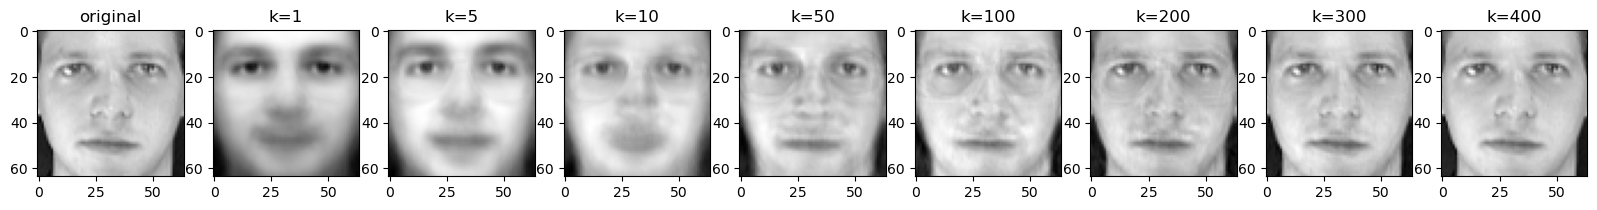

In [138]:
# extract mean vector and principal components from fitted PCA object
face_mean_x = pca.mean_ # your code here
face_principal_vectors = pca.components_ # your code here


face = faces[0] # consider the first image in the dataset (you can change this to any image in the dataset)
fig, axs = plt.subplots(figsize=(20,6), ncols=9)

# plot the original image
axs[0].imshow(face.reshape(image_shape), cmap='gray')
axs[0].set_title('original')

for rotated_ax, k in zip(axs[1:], [1, 5, 10, 50, 100, 200, 300, 400]):
    # compute the reconstruction using the first k principal components using `project_principal_vectors`
    reconstruction = project_principal_vectors(face, face_principal_vectors, face_mean_x, k) # your code here

    # plot the reconstructed image using the first k principal components
    rotated_ax.imshow(reconstruction.reshape(image_shape), cmap='gray')
    rotated_ax.set_title(f'k={k}')

What happens if we try to apply our PCA algorithm, which was fitted on images of faces, to an image of something that is not a face? Let's try! Below, we'll attempt to use PCA to reconstruct an image of a cute octopus.

/var/folders/ll/bn78crzd67nc85v6_q6g3k6r0000gn/T/ipykernel_51354/2268794337.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  cute_octopus = plt.imread('https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn3/cute_octopus.png')


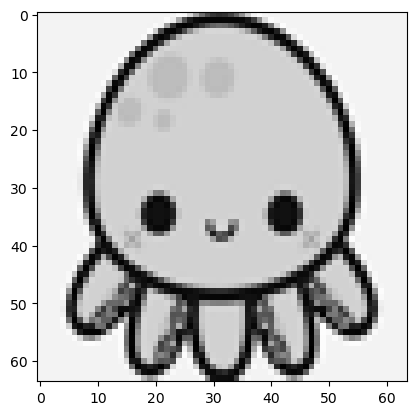

In [139]:
# source of image: "https://i.pinimg.com/originals/6d/dc/5a/6ddc5a4845441a5d93583a8b2f8f562f.jpg"
# the cute_octopus.png file is a cropped, reshaped, and grayscale version of the image

cute_octopus = plt.imread('https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn3/cute_octopus.png')
plt.imshow(cute_octopus, cmap='gray')
cute_octopus = cute_octopus.flatten() # flatten the image into a vector

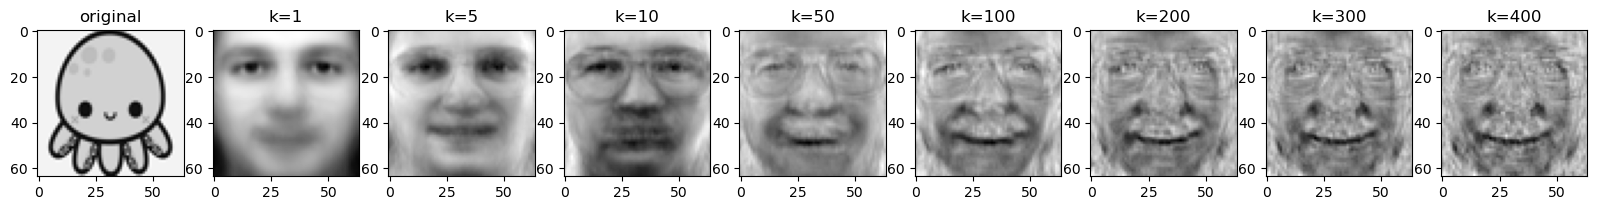

In [140]:
# extract mean vector and principal components from PCA object fitted to face data
face_mean_x = pca.mean_ # your code here
face_principal_vectors = pca.components_ # your code here


fig, axs = plt.subplots(figsize=(20,6), ncols=9)

# plot the original image
axs[0].imshow(cute_octopus.reshape(image_shape), cmap='gray')
axs[0].set_title('original')

for rotated_ax, k in zip(axs[1:], [1, 5, 10, 50, 100, 200, 300, 400]):
    # compute the reconstruction using the first k principal components using `project_principal_vectors`
    reconstruction = project_principal_vectors(cute_octopus, face_principal_vectors[:k], face_mean_x, k) # your code here

    # plot the reconstructed image using the first k principal components
    rotated_ax.imshow(reconstruction.reshape(image_shape), cmap='gray')
    rotated_ax.set_title(f'k={k}')

What do you observe about the reconstruction of the face image? How well do the reconstructed images match the original image at each $k$. What about the reconstruction of the octopus? Why do you think this is what we observe?

The reconstruction of the octopus is poor, even with a high number of components. This is because the PCA transformation was trained on face data, not octopus images. As 𝑘 increases, the image might capture more details of the octopus, but it might never truly resemble the original since the foundational components are based on human faces. PCA is a linear method that captures variance in the data. Since it was trained on face images, the principal components it identified correspond to features of faces. When applied to an octopus image, it attempts to use these face-specific components to reconstruct the image, resulting in a poor representation.

## Problem 3.2: Analyzing genetics data

In this sub-problem, we will PCA to analyzing genetics data. The data we will use comes from the [1000 Genomes Project](https://www.internationalgenome.org/).

A single-nucleotide polymorphism is a substitution of a single nucleotide at a specific location in the genome which is present in a sufficiently large segment of the population. An ancestry-informative SNP (AISNP) is a SNP which has significant variation across global populations. There exists a line of work identifying AISNPs. In this problem, we will use 55 AISNPs identified by [Kidd et al.](https://pubmed.ncbi.nlm.nih.gov/24508742/). We have pre-processed this data for you.

In this problem, you will use PCA to visualize and analyze this data.

In [83]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [84]:
# read in the SNP data
snp_data = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn3/1000genomes_snp_data.csv')
snp_cols = [col for col in snp_data.columns if col.startswith('rs')]
sample_attr_cols = ['pop', 'super_pop', 'gender']
snp_data.head()

,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,rs10497191,...,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,pop,super_pop,gender
0,0,1,0,2,0,0,0,1,0,2,...,0,0,2,2,1,1,0,GBR,EUR,male
1,0,2,0,2,0,0,0,0,0,2,...,0,0,2,1,0,0,1,GBR,EUR,female
2,0,1,0,1,2,1,0,2,0,2,...,0,0,1,1,0,0,1,GBR,EUR,female
3,0,2,0,2,0,0,0,2,1,2,...,1,0,2,2,0,0,0,GBR,EUR,female
4,0,1,0,2,1,1,0,2,2,2,...,0,0,2,2,1,0,1,GBR,EUR,male


In [90]:
# one-hot encode the SNP data using sklearn's OneHotEncoder for use with PCA
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(snp_data[snp_cols].values)

In [91]:
# fit PCA on the snp data in X; set the number of components to 2
pca = PCA(n_components=2) # your code here

# compute first two principal components of each sample in X
snp_pcs = pca.fit_transform(X) # your code here

# add the principal components to the snp_data dataframe
snp_data[['PC1', 'PC2']] = snp_pcs  # your code here

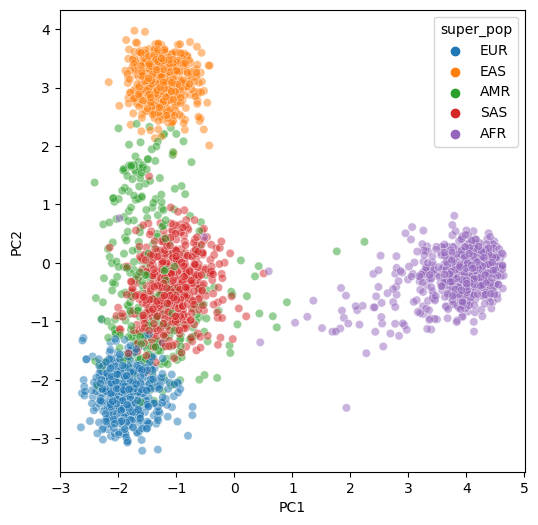

In [92]:
# plot the principal components in a scatter plot with super population color-coded

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=snp_data, x='PC1', y='PC2', hue='super_pop', alpha=0.5, ax=ax);

Take a look at this plot and think about any trends you see. Do you see any connection with geography?

Below, we will rotate this plot so that the center of the EUR and AFR samples on the PC plot lie vertically on top of each other.

In [93]:
# compute mean PC1 and PC2 for each super population
mean_by_superpop = snp_data.groupby('super_pop')[['PC1', 'PC2']].mean()
afr_pc_mean = mean_by_superpop.loc['AFR'].to_numpy()
eur_pc_mean = mean_by_superpop.loc['EUR'].to_numpy()

# compute angle between center of AFR and EUR clusters
angle = np.arctan2(eur_pc_mean[1] - afr_pc_mean[1], eur_pc_mean[0] - afr_pc_mean[0])
print(f'angle between AFR and EUR principal components: {angle:.2f} radians')

angle between AFR and EUR principal components: -2.81 radians


In [94]:
def create_rotation_mat(angle):
    '''creates 2D rotation matrix for given angle'''
    c, s = np.cos(angle), np.sin(angle)
    rotation_matrix = np.array(((c, -s), (s, c)))
    return rotation_matrix

# rotate the principal components by the angle between the AFR and EUR clusters
rotation_mat = create_rotation_mat(angle - np.pi/2)
rotated_pcs = snp_data[['PC1', 'PC2']].to_numpy() @ rotation_mat

# create lines denoting the principal components in the rotated axes
pc1_line = [(pc1, 0) for pc1 in ax.get_xlim()]
pc2_line = [(0, pc2) for pc2 in ax.get_ylim()]
pc1_line_rotated = pc1_line @ rotation_mat
pc2_line_rotated = pc2_line @ rotation_mat

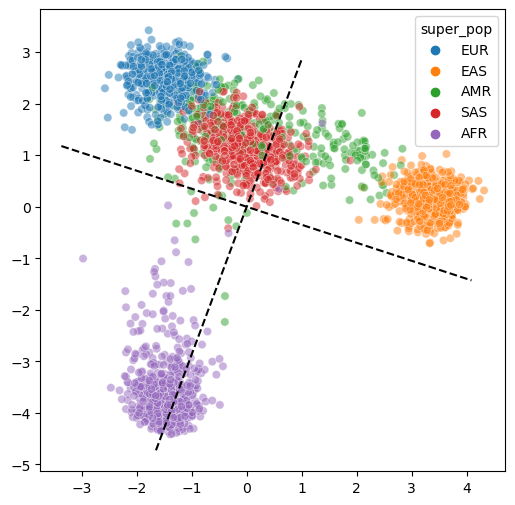

In [95]:
# plot rotated principal components
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=rotated_pcs[:, 0], y=rotated_pcs[:, 1], hue=snp_data['super_pop'], alpha=0.5);
ax.plot(pc1_line_rotated[:,0], pc1_line_rotated[:,1], color='black', linestyle='--', label='PC1');
ax.plot(pc2_line_rotated[:,0], pc2_line_rotated[:,1], color='black', linestyle='--', label='PC2');

For reference, below is a cartogram of the global population from wikipedia. It shows a map of the world with land area scaled according to population.


<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/Global_population_cartogram.png" width=1000px/>

Comment on any patterns you observe. Are "super populations" which are geographically closer also closer in terms of their first two principal components? Can you suggest any explanations for the patterns you observe?

Yes, the graph shows that geographically closer "super populations" are also closer in terms of their first two principal components. For instance, the Americas are clustered very closely together with similar PC2 values and Europe and Africa appear to have similar PC1 values. The proximity of clusters might indicate genetic similarities among those populations. 

There are many possible explanations for the observed patterns. Historical migrations and trade routes could have led to genetic mixing among geographically close populations. Isolated populations (like those on islands or secluded areas) might form distinct clusters since they had limited interaction with other populations.
Evolutionary pressures from local environments can lead to specific genetic adaptations, causing populations from similar environments (e.g., high altitudes or specific climates) to cluster together. 
